In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import date
from datetime import timedelta

import plotly.express as px

In [3]:
plt.style.use("Solarize_Light2") #sns.set_palette("dark") #sns.set_style("ticks")

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [67]:
df = pd.read_csv('/users/sahilchangotra/documents/big_basket_products.csv')
df.head(10)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.0,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...
6,7,Multani Mati,Beauty & Hygiene,Skin Care,Satinance,58.0,58.0,Face Care,3.6,Satinance multani matti is an excellent skin t...
7,8,Hand Sanitizer - 70% Alcohol Base,Beauty & Hygiene,Bath & Hand Wash,Bionova,250.0,250.0,Hand Wash & Sanitizers,4.0,70%Alcohol based is gentle of hand leaves skin...
8,9,Biotin & Collagen Volumizing Hair Shampoo + Bi...,Beauty & Hygiene,Hair Care,StBotanica,1098.0,1098.0,Shampoo & Conditioner,3.5,"An exclusive blend with Vitamin B7 Biotin, Hyd..."
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...


In [68]:
df.describe()

,index,sale_price,market_price,rating
count,27555.00000,27555.000000,27555.000000,18929.000000
mean,13778.00000,322.514808,382.056664,3.943410
std,7954.58767,486.263116,581.730717,0.739063
min,1.00000,2.450000,3.000000,1.000000
25%,6889.50000,95.000000,100.000000,3.700000
50%,13778.00000,190.000000,220.000000,4.100000
75%,20666.50000,359.000000,425.000000,4.300000
max,27555.00000,12500.000000,12500.000000,5.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


### Top and Least sold products

In [7]:
top_sold = df.groupby('product')['product'].count().sort_values(ascending=False).head(15)

In [8]:
top_sold

product
Turmeric Powder/Arisina Pudi          26
Extra Virgin Olive Oil                15
Cow Ghee/Tuppa                        14
Olive Oil - Extra Virgin              12
Soft Drink                            12
Colorsilk Hair Colour With Keratin    12
Ghee/Tuppa                            11
Coriander Powder                      11
Powder - Coriander                    11
Peanut Butter - Creamy                10
Casting Creme Gloss Hair Color        10
Hand Sanitizer                        10
Masala - Chicken                       9
Chia Seeds                             9
Olive Oil - Pomace                     9
Name: product, dtype: int64

In [11]:
least_sold = df.groupby('product')['product'].count().sort_values(ascending=False).tail(15)

In [ ]:
least_sold

product
Ghee/Tuppa - Detox Tadka                                                    1
Ghee Spreads - Dark Chocolate Orange                                        1
Ghee Spreads - Chocolate Caramel + Dark Chocolate Orange (each of 125 g)    1
Ghee Spreads - Chocolate Caramel                                            1
Ghee Chutney Khakhra - Mint                                                 1
Ghee Badam Laddoo                                                           1
Get Slim Juice                                                              1
Get Slim Ayurvedic Tea - 7 Active Ingredients                               1
Germi Check+ 12h Germ Protection Toothpaste                                 1
Germ-Kill Spray                                                             1
Germ Removal Detergent                                                      1
Germ Protection Soap                                                        1
Germ Protection Multipurpose Thick & Soft Wet Wipes with

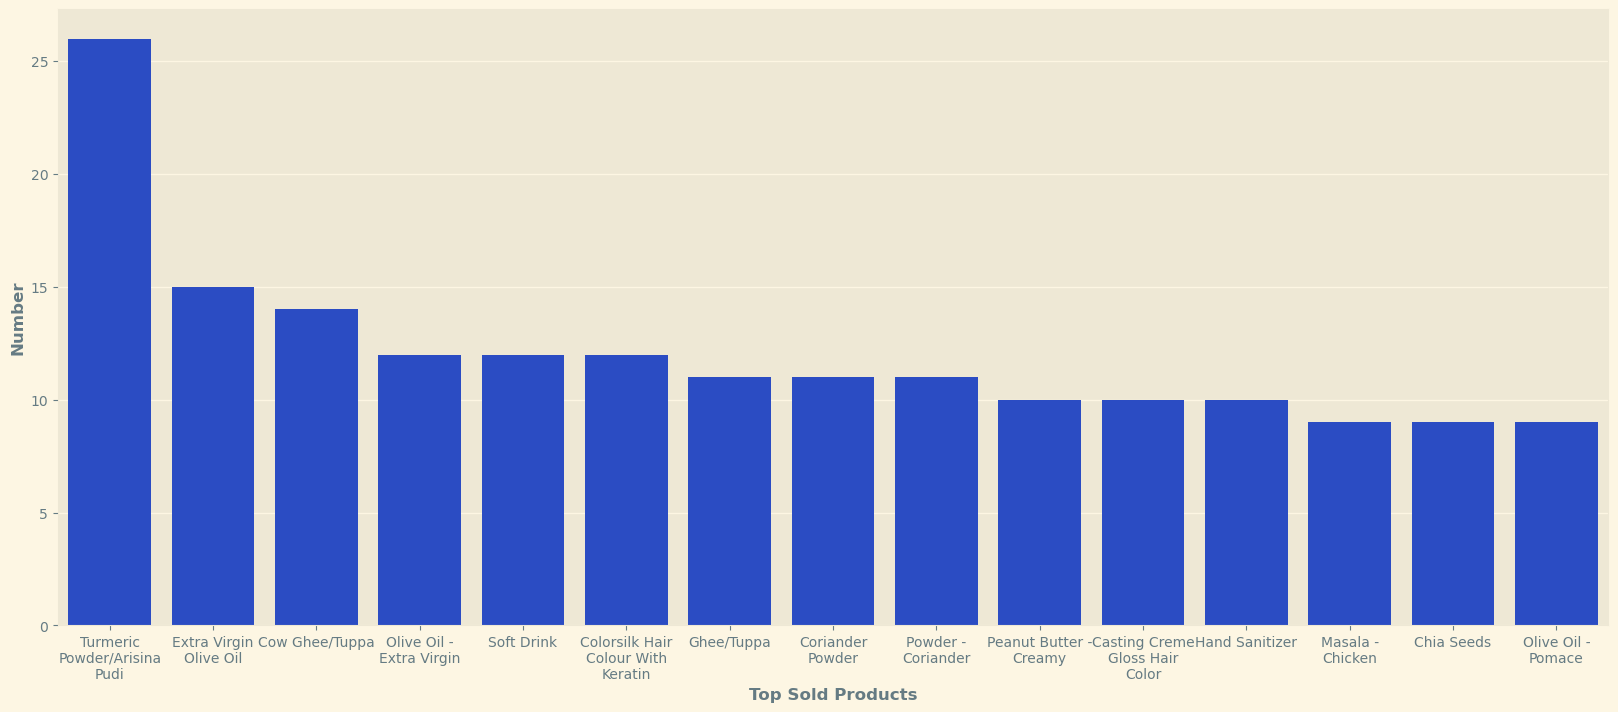

In [40]:
# Visualizing the top_sold

import textwrap


top_sold_df = top_sold.reset_index(name='count')
top_sold_df.columns = ['product','count']

# wrap product names to new lines.
top_sold_df['product'] = top_sold_df['product'].apply(lambda x: '\n'.join(textwrap.wrap(x,15)))

plt.figure(figsize=(20,8))
sns.barplot(data=top_sold_df, x='product', y = 'count',color="#123edc")
plt.xlabel('Top Sold Products', weight='semibold')
plt.ylabel('Number', weight='semibold')
plt.xticks(rotation=0)
plt.show()

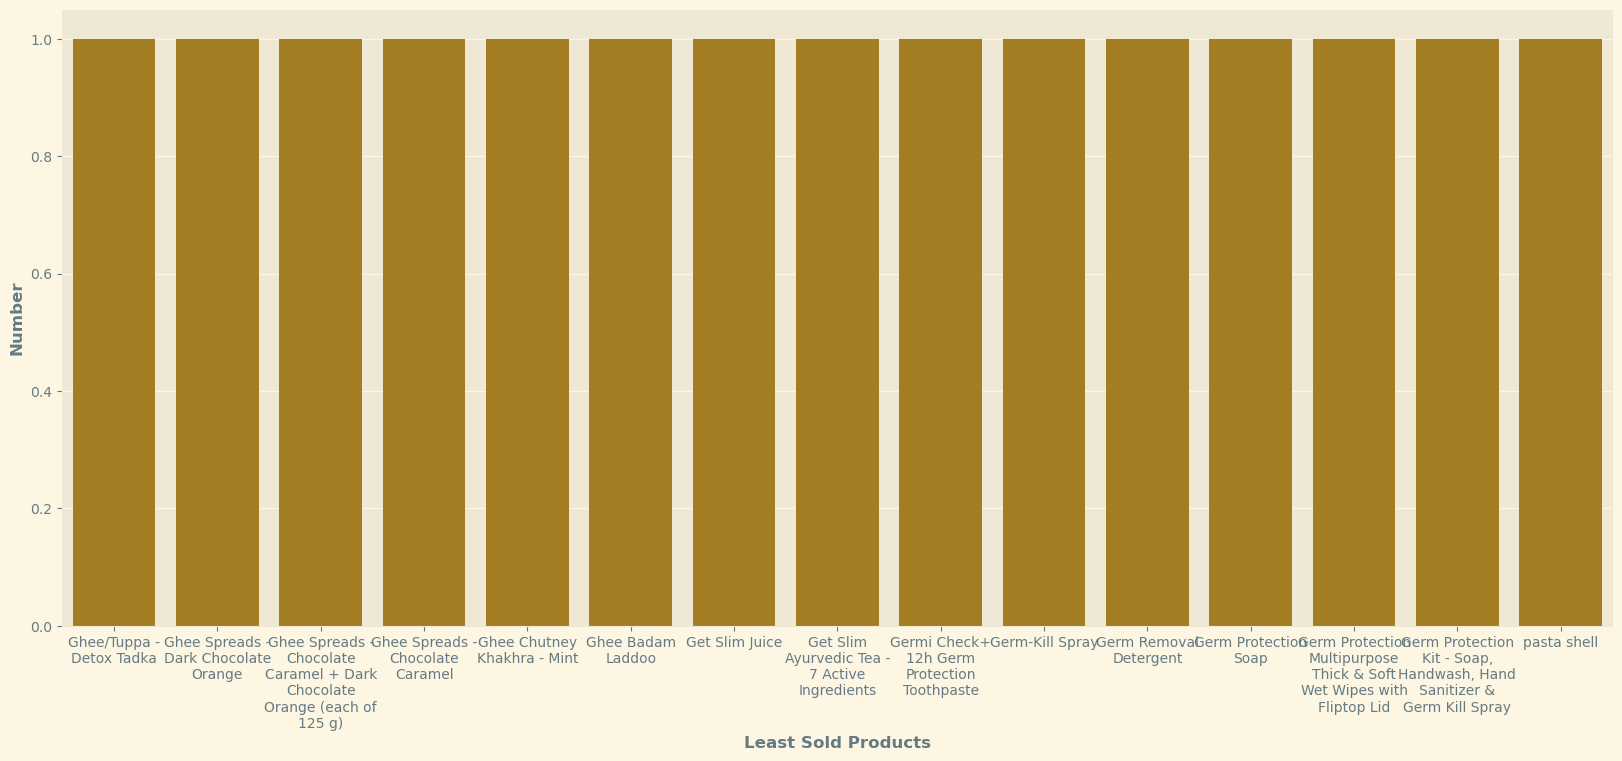

In [43]:
# visualizing the least_sold

least_sold_df = least_sold.reset_index(name='count')
least_sold_df.columns = ['product','count']

# wrap product names to new lines
least_sold_df['product'] = least_sold_df['product'].apply(lambda x: '\n'.join(textwrap.wrap(x,15)))

plt.figure(figsize=(20,8))
sns.barplot(data=least_sold_df, x = 'product', y = 'count', color="darkgoldenrod")
plt.xlabel('Least Sold Products', weight='semibold')
plt.ylabel('Number', weight='semibold')
plt.show()

### Top and least sold categories

In [44]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [53]:
def wrap_labels(ax, width=15):
    """
    Wrap long x-axis labels for better readability.
    
    Parameters:
    ax : matplotlib.axes.Axes
        The axes object containing the plot.
    width : int, optional (default=15)
        The max number of characters per line before wrapping.
    """
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        wrapped = '\n'.join(textwrap.wrap(text, width))
        labels.append(wrapped)
    ax.set_xticklabels(labels)
    plt.tight_layout()

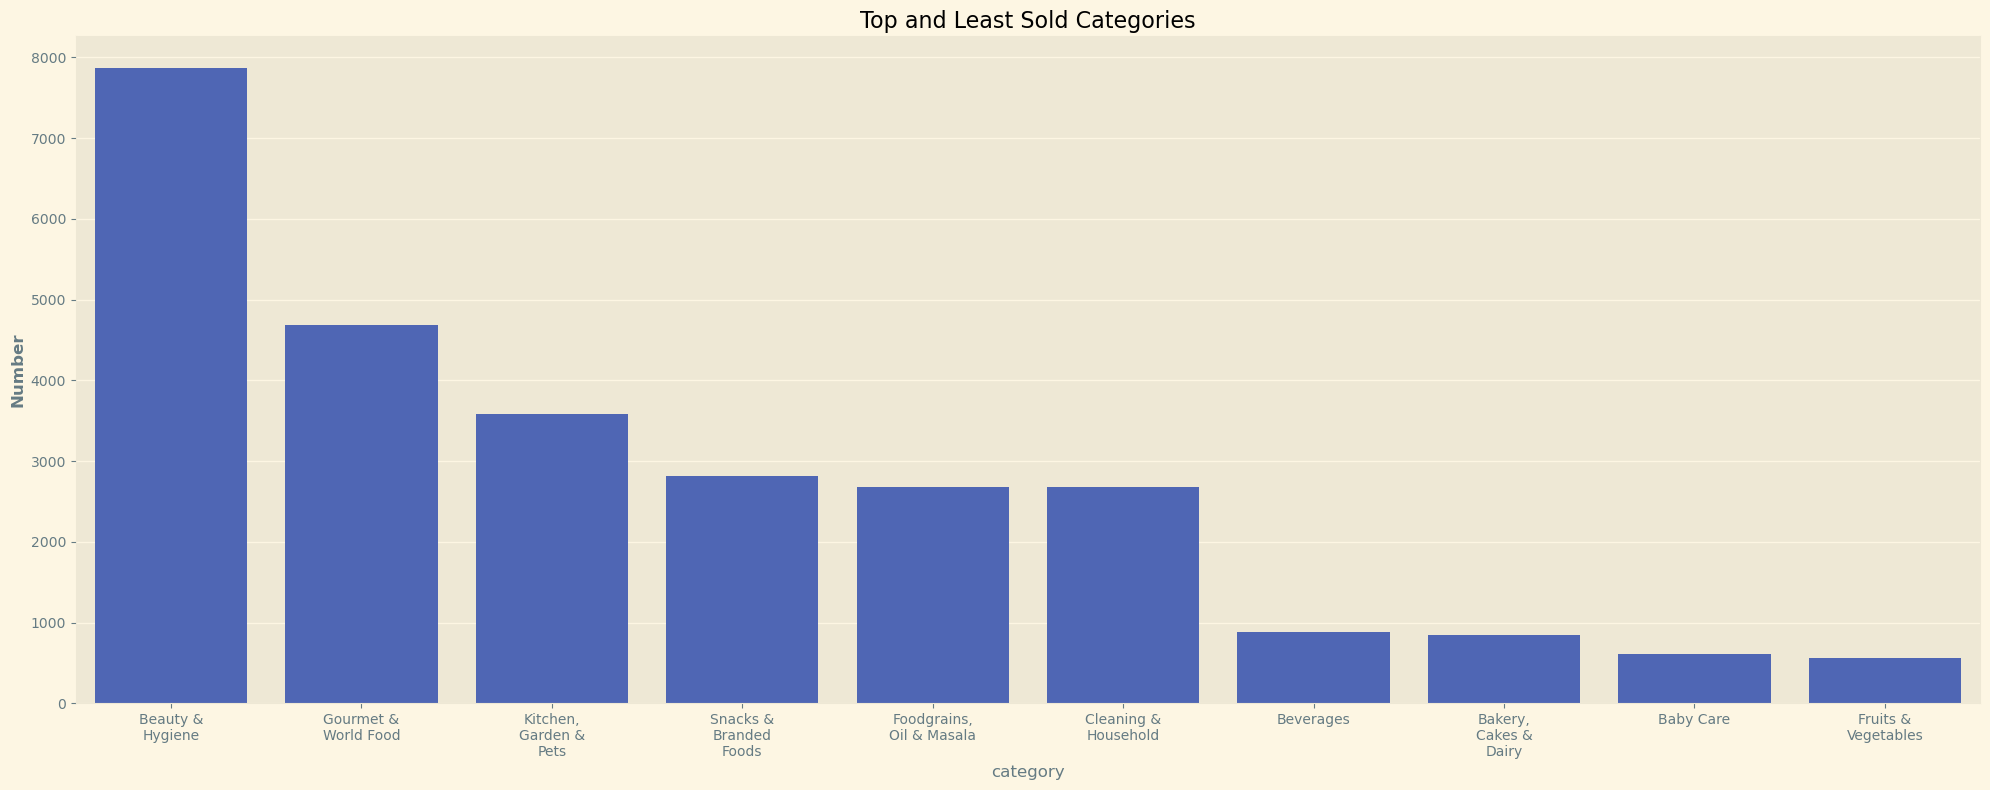

In [71]:
# visualize dataset to check top and least sold categories.

top_sold_category = df['category'].value_counts().head(10).reset_index(name='count')
top_sold_category.columns = ['category','count']

plt.figure(figsize=(20,8))
ax = sns.barplot(data=top_sold_category,x='category',y='count', color="#3e5dc5")
plt.title('Top and Least Sold Categories')
plt.ylabel('Number', weight='semibold')
wrap_labels(ax,width=12)
plt.show()

### Effect of discounted prices

In [72]:
df['diff_in_prices'] = df['market_price'] - df['sale_price']

In [74]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,diff_in_prices
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.0
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ...",0.0
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",131.0
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,27.0
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.0


In [76]:
discount = df[df['diff_in_prices']!=0]
discount

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,diff_in_prices
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.00,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m...",131.00
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.00,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...,27.00
5,6,Germ - Removal Multipurpose Wipes,Cleaning & Household,All Purpose Cleaners,Nature Protect,169.00,199.0,Disinfectant Spray & Cleaners,3.3,Stay protected from contamination with Multipu...,30.00
10,11,Wheat Grass Powder - Raw,Gourmet & World Food,Cooking & Baking Needs,NUTRASHIL,261.00,290.0,Flours & Pre-Mixes,4.0,Wheatgrass is a superfood potent health food w...,29.00
15,16,Dove Plastic Soap Case - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,49.00,59.0,Soap Cases & Dispensers,4.0,This soap case is made of virgin plastic which...,10.00
...,...,...,...,...,...,...,...,...,...,...,...
27546,27547,Organic Powder - Garam Masala,"Foodgrains, Oil & Masala",Organic Staples,Organic Tattva,152.00,160.0,Organic Masalas & Spices,4.2,Organic Tattva Garam masala is a famous spice ...,8.00
27550,27551,"Wottagirl! Perfume Spray - Heaven, Classic",Beauty & Hygiene,Fragrances & Deos,Layerr,199.20,249.0,Perfume,3.9,Layerr brings you Wottagirl Classic fragrant b...,49.80
27551,27552,Rosemary,Gourmet & World Food,Cooking & Baking Needs,Puramate,67.50,75.0,"Herbs, Seasonings & Rubs",4.0,Puramate rosemary is enough to transform a dis...,7.50
27553,27554,Green Tea - Pure Original,Beverages,Tea,Tetley,396.00,495.0,Tea Bags,4.2,"Tetley Green Tea with its refreshing pure, ori...",99.00


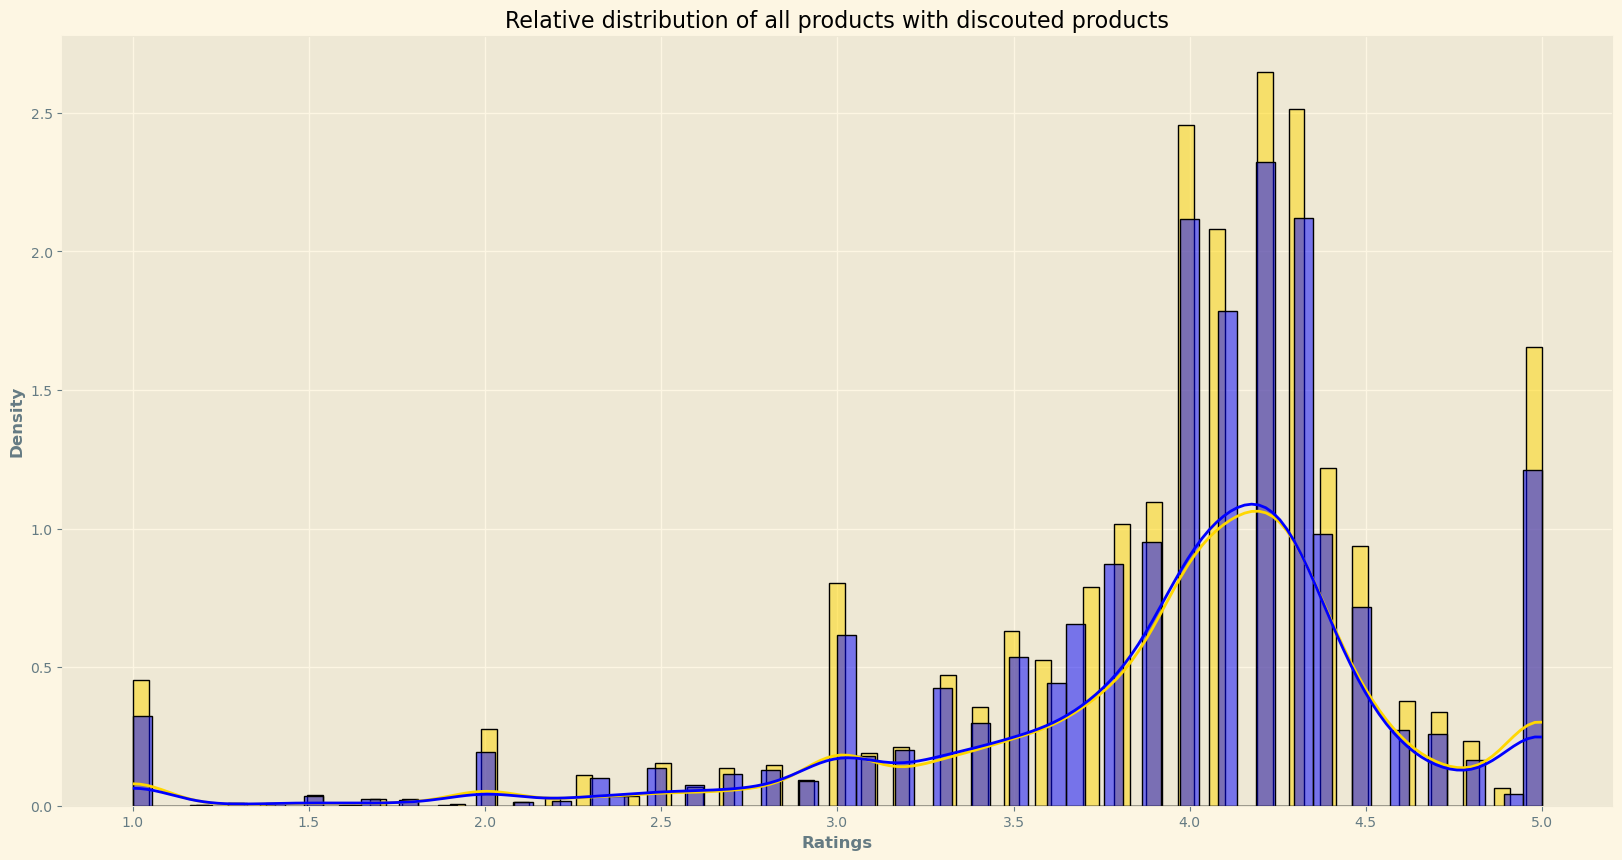

In [86]:
plt.figure(figsize=(20,10))
plt.style.use("Solarize_Light2")

sns.histplot(df.rating,color='gold',kde=True,stat='density')
sns.histplot(discount.rating,color='b',kde=True,stat='density')

plt.xlabel('Ratings',weight='semibold')
plt.ylabel('Density',weight='semibold')
plt.title('Relative distribution of all products with discouted products')
plt.show()

### EDA of high rated products(more than 4 rating)

In [88]:
highrated = df.query('rating > 4', inplace=False)
print("Number of products with more than 4 rating is", highrated.shape[0])

Number of products with more than 4 rating is 10264


In [89]:
highrated.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description,diff_in_prices
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...,0.0
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...,0.0
9,10,"Scrub Pad - Anti- Bacterial, Regular",Cleaning & Household,"Mops, Brushes & Scrubs",Scotch brite,20.0,20.0,"Utensil Scrub-Pad, Glove",4.3,Scotch Brite Anti- Bacterial Scrub Pad thoroug...,0.0
12,13,"Face Wash - Oil Control, Active",Beauty & Hygiene,Skin Care,Oxy,110.0,110.0,Face Care,5.0,This face wash deeply cleanses dirt and impuri...,0.0
14,15,Just Spray - Mosquito Repellent Room Spray,Cleaning & Household,Fresheners & Repellents,Herbal Strategi,200.0,200.0,Mosquito Repellent,4.2,Strategi Just Spray is a very effective 100% H...,0.0


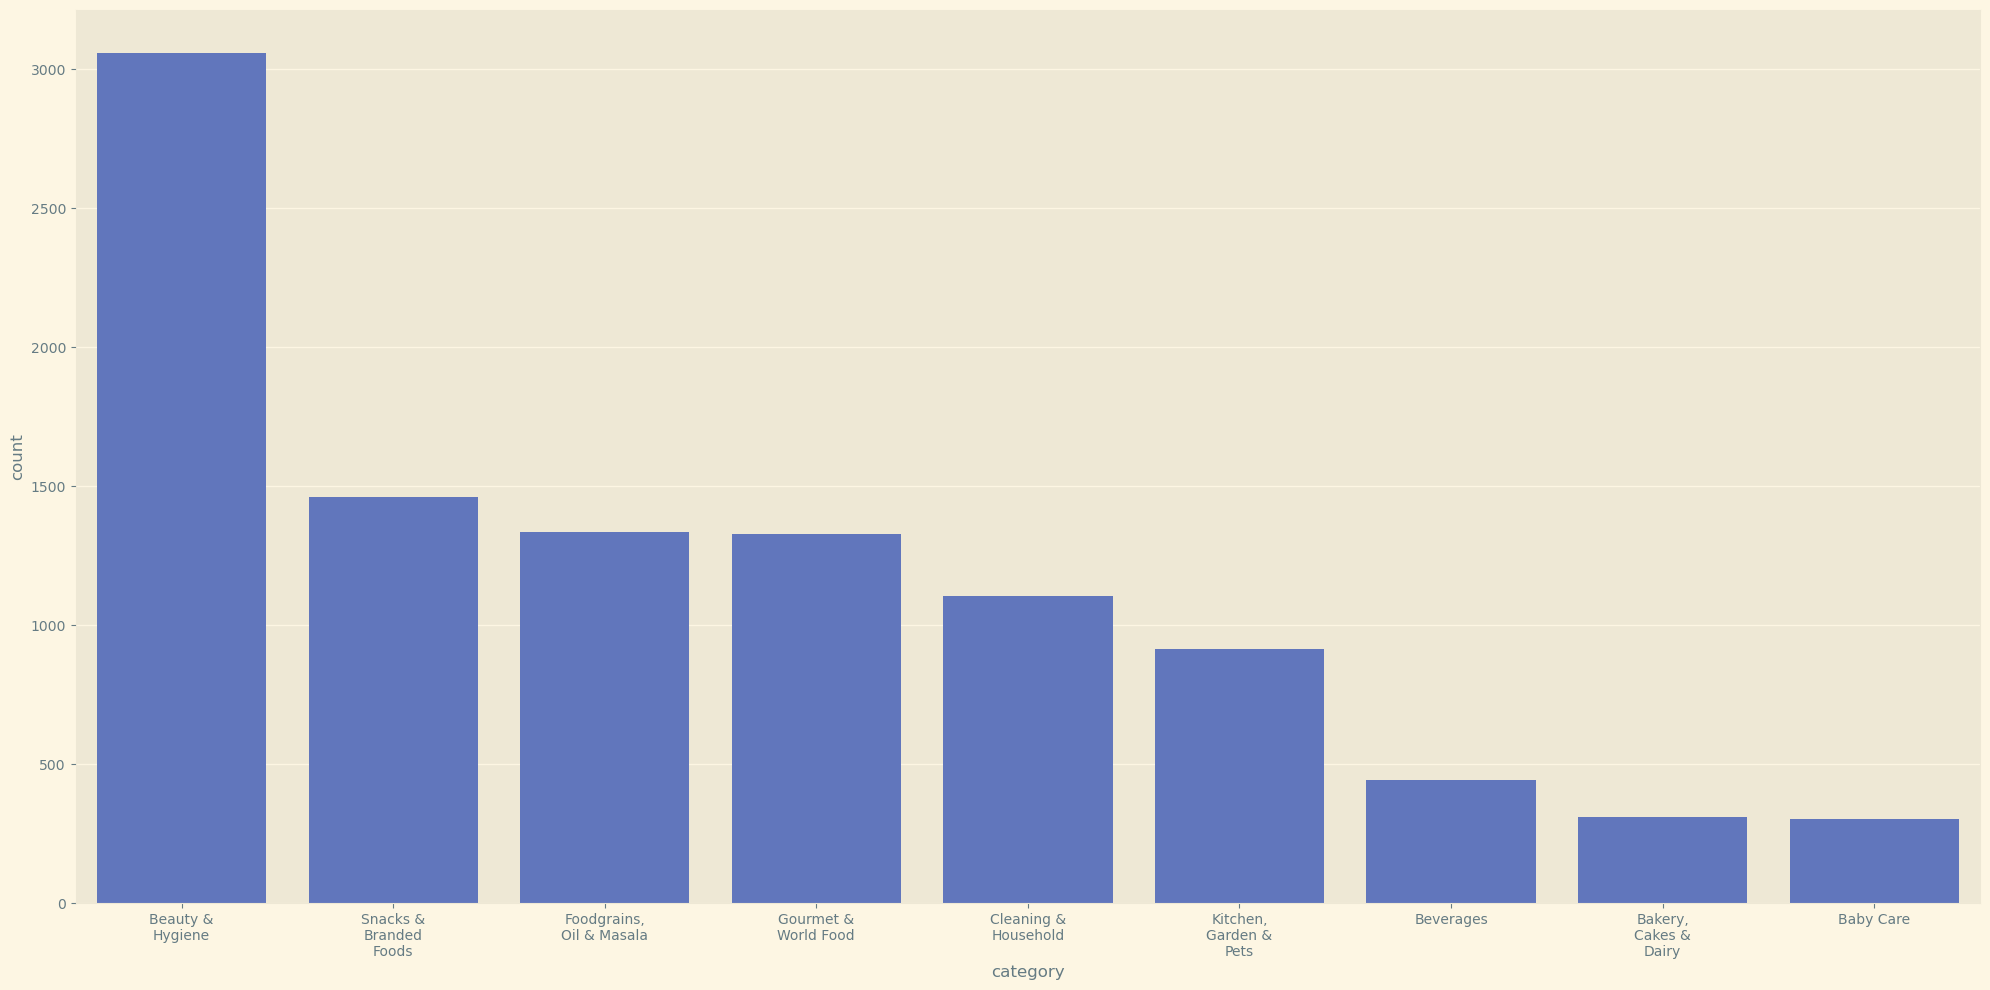

In [95]:
highrated_category = highrated['category'].value_counts().head(10).reset_index(name='count')
highrated_category.columns = ['category', 'count']

plt.figure(figsize=(20,10))
ax = sns.barplot(x='category',y='count',
                 data=highrated_category,color="#526ecb")
wrap_labels(ax,width=12)
plt.show()